# Retrieve DDL measurements

In [1]:
import matplotlib.pyplot as plt
import ddlpy

# enabling debug logging so we can see what happens in the background
import logging
logging.basicConfig()
logging.getLogger("ddlpy").setLevel(logging.DEBUG)

## Get a list of all known locations
The  method locations gets a list of all known measurement locations by sending a request. 

In [2]:
locations = ddlpy.locations()

DEBUG:ddlpy.ddlpy:Requesting at https://ddapi20-waterwebservices.rijkswaterstaat.nl/METADATASERVICES/OphalenCatalogus with request: {"CatalogusFilter": {"Eenheden": true, "Grootheden": true, "Hoedanigheden": true, "Groeperingen": true, "Parameters": true, "ProcesTypes": true, "Compartimenten": true}}


In [3]:
locations.to_json(r'locations.json', orient='records')

In [4]:
## also add code as a variable
locations['Code'] = locations.index
locations.head()

,Locatie_MessageID,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Compartiment.Code,Compartiment.Omschrijving,...,Grootheid.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,,,
steenbergen.roosendaalsevliet,5779,51.641197,4.242284,ETRS89,"Steenbergen, Roosendaalsevliet","Steenbergen, Roosendaalsevliet",(massa)Concentratie som benzo(b)fluorantheen e...,meting,OW,Oppervlaktewater,...,(massa)Concentratie,ug/l,microgram per liter,NVT,NVT,sBbjF,som benzo(b)fluorantheen en benzo(j)fluorantheen,,,steenbergen.roosendaalsevliet
terschelling.135kmuitdekust,2686,54.414843,4.039740,ETRS89,"Terschelling, 135 km uit de kust","Terschelling, 135 km uit de kust",(massa)Concentratie stikstof Kjeldahl in Opper...,meting,OW,Oppervlaktewater,...,(massa)Concentratie,mg/l,milligram per liter,N,uitgedrukt in stikstof,NKj,stikstof Kjeldahl,,,terschelling.135kmuitdekust
oesterdam,14474,51.473934,4.227061,ETRS89,Oesterdam,Oesterdam,(massa)Concentratie waterstofcarbonaat in Oppe...,meting,OW,Oppervlaktewater,...,(massa)Concentratie,mg/l,milligram per liter,NVT,NVT,HCO3,waterstofcarbonaat,,,oesterdam
noordwijk.50kmuitdekust,10498,52.480053,3.785347,ETRS89,"Noordwijk, 50 km uit de kust","Noordwijk, 50 km uit de kust",Geleidendheid in Oppervlaktewater in mS/m,meting,OW,Oppervlaktewater,...,Geleidendheid,mS/m,millisiemens per meter,NVT,NVT,NVT,NVT,,,noordwijk.50kmuitdekust
brakel,10578,51.826764,5.104336,ETRS89,Brakel,Andelse Maas,(massa)Concentratie som methyleenblauwactieve ...,meting,OW,Oppervlaktewater,...,(massa)Concentratie,mg/l,milligram per liter,NVT,NVT,sMBAS,som methyleenblauwactieve stoffen anionactief,,,brakel


## Validate
Check  if data is in the domain of the Netherlands. It also includes data of the North Sea.

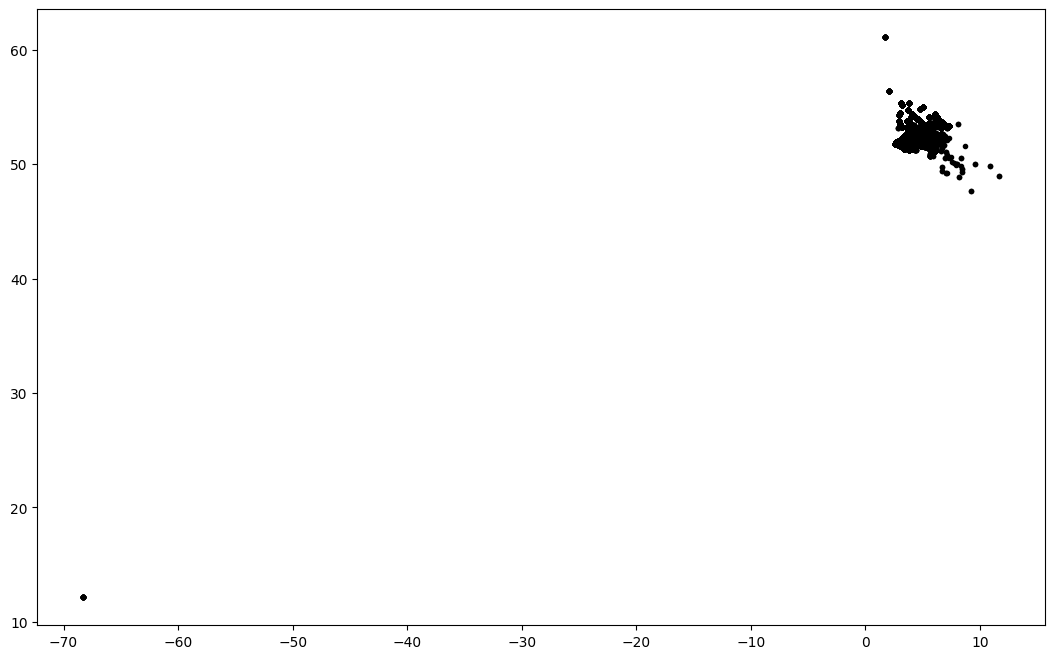

In [5]:
## Create a spatial plot
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(locations.Lon, locations.Lat, 'k.')

In [6]:
# CHECK See what the data in the east is.
# These is a reference river for water quality near Chernobyl. 
locations.sort_values('Lon',  ascending=False).head(n=5)

,Locatie_MessageID,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Compartiment.Code,Compartiment.Omschrijving,...,Grootheid.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,,,
riedenburg,9108,48.966667,11.666667,ETRS89,Riedenburg,Riedenburg,Etmaalgemiddelde Waterhoogte in Oppervlaktewat...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,riedenburg
riedenburg,9108,48.966667,11.666667,ETRS89,Riedenburg,Riedenburg,Waterhoogte in Oppervlaktewater t.o.v. plaatse...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,PLAATSLR,t.o.v. plaatselijk referentievlak,NVT,NVT,,,riedenburg
bamberg,10201,49.883333,10.883333,ETRS89,Bamberg,Bamberg,Waterhoogte in Oppervlaktewater t.o.v. plaatse...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,PLAATSLR,t.o.v. plaatselijk referentievlak,NVT,NVT,,,bamberg
bamberg,10201,49.883333,10.883333,ETRS89,Bamberg,Bamberg,Etmaalgemiddelde Waterhoogte in Oppervlaktewat...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,bamberg
steinbach,10205,49.999199,9.582227,ETRS89,Steinbach,Steinbach,Waterhoogte in Oppervlaktewater t.o.v. plaatse...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,PLAATSLR,t.o.v. plaatselijk referentievlak,NVT,NVT,,,steinbach


In [7]:
bool_stations = locations.index.isin(['hoekvanholland', 'ijmuiden.buitenhaven', 'scheveningen'])
bool_procestype = locations['ProcesType'].isin(['meting']) # meting/astronomisch/verwachting
bool_grootheid = locations['Grootheid.Code'].isin(['WATHTE']) # waterlevel (WATHTE)
bool_groepering = locations['Groepering.Code'].isin(['']) # timeseries (NVT) versus extremes
bool_hoedanigheid = locations['Hoedanigheid.Code'].isin(['NAP']) # vertical reference (NAP/MSL)
selected = locations.loc[bool_stations & bool_procestype & bool_grootheid & bool_groepering & bool_hoedanigheid]
selected

,Locatie_MessageID,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Compartiment.Code,Compartiment.Omschrijving,...,Grootheid.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,,,
ijmuiden.buitenhaven,13729,52.463000,4.555000,ETRS89,"IJmuiden, buitenhaven","IJmuiden, buitenhaven",Etmaalgemiddelde Waterhoogte in Oppervlaktewat...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,ijmuiden.buitenhaven
hoekvanholland,1319,51.976899,4.119827,ETRS89,Hoek van Holland,rechter oever kilometer 1030.1,Etmaalgemiddelde Waterhoogte in Oppervlaktewat...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,hoekvanholland
scheveningen,13179,52.099035,4.263563,ETRS89,Scheveningen,Scheveningen,Etmaalgemiddelde Waterhoogte in Oppervlaktewat...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,scheveningen


In [8]:
names = 'uit de kust'
selected = locations[locations.Naam.str.contains(names)].head()
selected

,Locatie_MessageID,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Compartiment.Code,Compartiment.Omschrijving,...,Grootheid.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,,,
terschelling.135kmuitdekust,2686,54.414843,4.039740,ETRS89,"Terschelling, 135 km uit de kust","Terschelling, 135 km uit de kust",(massa)Concentratie stikstof Kjeldahl in Opper...,meting,OW,Oppervlaktewater,...,(massa)Concentratie,mg/l,milligram per liter,N,uitgedrukt in stikstof,NKj,stikstof Kjeldahl,,,terschelling.135kmuitdekust
noordwijk.50kmuitdekust,10498,52.480053,3.785347,ETRS89,"Noordwijk, 50 km uit de kust","Noordwijk, 50 km uit de kust",Geleidendheid in Oppervlaktewater in mS/m,meting,OW,Oppervlaktewater,...,Geleidendheid,mS/m,millisiemens per meter,NVT,NVT,NVT,NVT,,,noordwijk.50kmuitdekust
egmondaanzee.1kmuitdekust,7858,52.620063,4.607176,ETRS89,"Egmond aan Zee, 1 km uit de kust","Egmond aan Zee, 1 km uit de kust",Massafractie monobutyltin (kation) in Bodem/Se...,meting,BS,Bodem/Sediment,...,Massafractie,ug/kg,microgram per kilogram,dg,t.o.v. drooggewicht,MC4ySn,monobutyltin (kation),,,egmondaanzee.1kmuitdekust
noordwijk.70kmuitdekust,13826,52.585331,3.530060,ETRS89,"Noordwijk, 70 km uit de kust","Noordwijk, 70 km uit de kust",(massa)Concentratie trans-heptachloorepoxide i...,meting,OW,Oppervlaktewater,...,(massa)Concentratie,ug/l,microgram per liter,NVT,NVT,tHpClepO,trans-heptachloorepoxide,,,noordwijk.70kmuitdekust
noordwijk.10kmuitdekust.flachsee,17911,52.290014,4.305106,ETRS89,"Noordwijk, 10 km uit de kust Flachsee",Flachseemeting,Massafractie Gloeiverlies in Zwevende stof t.o...,meting,ZS,Zwevende stof,...,Massafractie,%,procent,dg,t.o.v. drooggewicht,GV,Gloeiverlies,,,noordwijk.10kmuitdekust.flachsee


In [9]:
# multiple parameters avaialble per location, each combination is a row
selected = locations.loc['scheveningen']
selected

,Locatie_MessageID,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Compartiment.Code,Compartiment.Omschrijving,...,Grootheid.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,,,
scheveningen,13179,52.099035,4.263563,ETRS89,Scheveningen,Scheveningen,Percentielen per etmaal Levendigheid 90 percen...,meting,OW,Oppervlaktewater,...,90 percentiel van de levendigheid,cm2,vierkante centimeter,NVT,NVT,NVT,NVT,LEVDHD5,Levendigheid,scheveningen
scheveningen,13179,52.099035,4.263563,ETRS89,Scheveningen,Scheveningen,Versie,meting,NT,Niet van toepassing,...,Versie,DIMSLS,dimensieloos,NVT,NVT,NVT,NVT,SLOTGMDDE,Slotgemiddelden,scheveningen
scheveningen,13179,52.099035,4.263563,ETRS89,Scheveningen,Scheveningen,Slotgemiddelde hoogwater in Oppervlaktewater B...,meting,OW,Oppervlaktewater,...,Slotgemiddelde hoogwater,cm,centimeter,SPRINGTY,Bij springtij,NVT,NVT,SLOTGMDDE,Slotgemiddelden,scheveningen
scheveningen,13179,52.099035,4.263563,ETRS89,Scheveningen,Scheveningen,Etmaalgemiddelde Getijextreemtype in Oppervlak...,meting,OW,Oppervlaktewater,...,NVT,DIMSLS,dimensieloos,NVT,NVT,NVT,NVT,GETETM2,Getijextremen,scheveningen
scheveningen,13179,52.099035,4.263563,ETRS89,Scheveningen,Scheveningen,Slotgemiddelde waterstand in Oppervlaktewater ...,meting,OW,Oppervlaktewater,...,Slotgemiddelde waterstand,cm,centimeter,NVT,NVT,NVT,NVT,SLOTGMDDE,Slotgemiddelden,scheveningen
scheveningen,13179,52.099035,4.263563,ETRS89,Scheveningen,Scheveningen,Waterhoogte astronomisch in Oppervlaktewater t...,astronomisch,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,GETETBRKD2,Getijextreem berekend,scheveningen
scheveningen,13179,52.099035,4.263563,ETRS89,Scheveningen,Scheveningen,Percentielen per etmaal Levendigheid 70 percen...,meting,OW,Oppervlaktewater,...,70 percentiel van de levendigheid,cm2,vierkante centimeter,NVT,NVT,NVT,NVT,LEVDHD5,Levendigheid,scheveningen
scheveningen,13179,52.099035,4.263563,ETRS89,Scheveningen,Scheveningen,Levendigheid in Oppervlaktewater in cm2,meting,OW,Oppervlaktewater,...,NVT,cm2,vierkante centimeter,NVT,NVT,NVT,NVT,,,scheveningen
scheveningen,13179,52.099035,4.263563,ETRS89,Scheveningen,Scheveningen,Etmaalgemiddelde Waterhoogte in Oppervlaktewat...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,GETETM2,Getijextremen,scheveningen


In [10]:
# subset to a single location/measurement location (waterhoogte timeseries for Scheveningen)
bool_stations = locations.index.isin(['ameland.nes'])
# meting/astronomisch/verwachting
bool_procestype = locations['ProcesType'].isin(['meting'])
# waterlevel/waterhoogte (WATHTE)
bool_grootheid = locations['Grootheid.Code'].isin(['WATHTE'])
# timeseries (NVT) versus extremes
bool_groepering = locations['Groepering.Code'].isin([''])
selected = locations.loc[bool_stations & bool_procestype & bool_grootheid & bool_groepering]
selected

,Locatie_MessageID,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Compartiment.Code,Compartiment.Omschrijving,...,Grootheid.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,,,
ameland.nes,6200,53.429766,5.759448,ETRS89,"Ameland, Nes","Ameland, Nes",Etmaalgemiddelde Waterhoogte in Oppervlaktewat...,meting,OW,Oppervlaktewater,...,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,ameland.nes


In [11]:
# if we pass one row to the measurements function you can get all the measurements
measurements = ddlpy.measurements(selected.iloc[0], "2019-05-01", "2020-02-01")

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:07<00:00,  1.25it/s]
DEBUG:ddlpy.ddlpy:8 duplicated values dropped


<Axes: xlabel='time'>

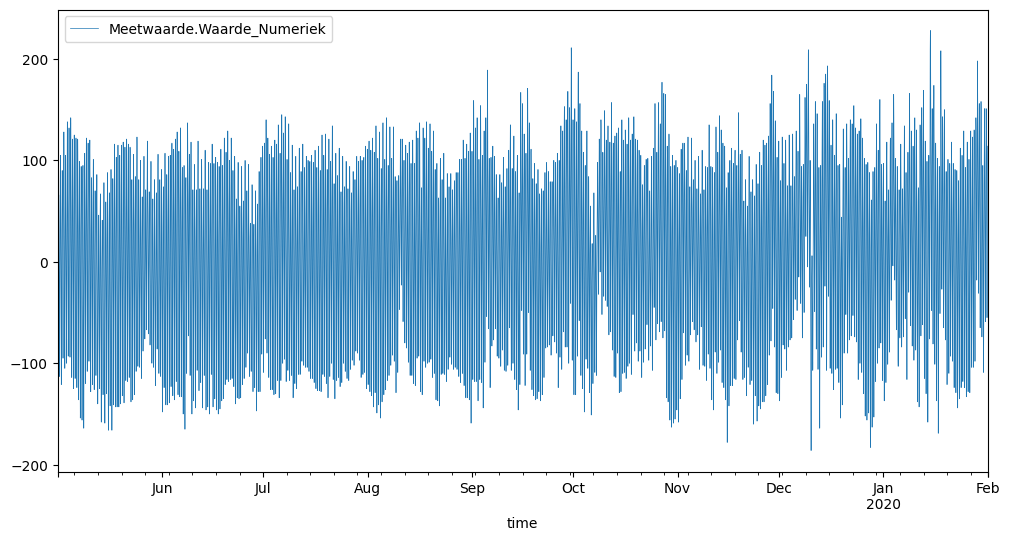

In [12]:
measurements.plot(y='Meetwaarde.Waarde_Numeriek', linewidth=0.5, figsize=(12, 6))

In [13]:
measurements

,WaarnemingMetadata.Statuswaarde,WaarnemingMetadata.Bemonsteringshoogte,WaarnemingMetadata.Referentievlak,WaarnemingMetadata.OpdrachtgevendeInstantie,WaarnemingMetadata.Kwaliteitswaardecode,Compartiment.Code,Compartiment.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Eenheid.Code,...,WaardeBewerkingsMethode.Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Meetwaarde.Waarde_Alfanumeriek,Meetwaarde.Waarde_Numeriek,Code,Coordinatenstelsel,Naam,Lon,Lat
time,,,,,,,,,,,,,,,,,,,,,
2019-05-01 01:00:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,-123,-123.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766
2019-05-01 01:10:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,-128,-128.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766
2019-05-01 01:20:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,-131,-131.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766
2019-05-01 01:30:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,-134,-134.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766
2019-05-01 01:40:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,-135,-135.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01 00:20:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,98,98.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766
2020-02-01 00:30:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,102,102.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766
2020-02-01 00:40:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,106,106.0,ameland.nes,ETRS89,"Ameland, Nes",5.759448,53.429766


## Convert to xarray

In [14]:
# convert to xarray: constant columns are converted to attributes to save disk space, except the columns in always_preserve
always_preserve = [
    'WaarnemingMetadata.Statuswaarde',
    'WaarnemingMetadata.Kwaliteitswaardecode',
    'Groepering.Code',
    'WaardeBepalingsMethode.Code',
    'Meetwaarde.Waarde_Numeriek',
    ]
ds = ddlpy.dataframe_to_xarray(measurements, always_preserve=always_preserve)
ds

<xarray.Dataset> Size: 2MB
Dimensions:                                  (time: 39745)
Coordinates:
  * time                                     (time) datetime64[ns] 318kB 2019...
Data variables:
    WaarnemingMetadata.Statuswaarde          (time) object 318kB 'Gecontrolee...
    WaarnemingMetadata.Kwaliteitswaardecode  (time) object 318kB '00' ... '00'
    Groepering.Code                          (time) object 318kB '' '' ... '' ''
    WaardeBepalingsMethode.Code              (time) object 318kB 'other:F007'...
    Meetwaarde.Waarde_Numeriek               (time) float64 318kB -123.0 ... ...
Attributes: (12/43)
    WaarnemingMetadata.Bemonsteringshoogte:       -999999999
    WaarnemingMetadata.Referentievlak:            NVT
    WaarnemingMetadata.OpdrachtgevendeInstantie:  RIKZMON_WAT
    Compartiment.Code:                            OW
    Compartiment.Omschrijving:                    Oppervlaktewater
    Grootheid.Code:                               WATHTE
    ...                                           ...
    Meetwaarde.Waarde_Alfanumeriek:               -123
    Code:                                         ameland.nes
    Coordinatenstelsel:                           ETRS89
    Naam:                                         Ameland, Nes
    Lon:                                          5.759448
    Lat:                                          53.429766